# 🧩 Generación y Comparación de Resultados DBSCAN Paralelo

Este notebook crea datasets sintéticos con `make_blobs` y luego compara los resultados de `DBSCAN` entre la versión de `scikit-learn` y una implementación paralela (`OMP2`).

In [ ]:
# 📦 Generación de datasets
from sklearn.datasets import make_blobs
import numpy as np
import os

os.makedirs("input", exist_ok=True)

for n_points in [20000, 40000, 80000, 120000, 140000, 160000, 180000, 200000]:
    points, _ = make_blobs(
        n_samples=n_points,
        centers=4,
        cluster_std=0.06,
        random_state=11,
        center_box=(0, 1.0)
    )
    points = np.round(np.abs(points[:, ::-1]), 3)
    np.savetxt(f"input/{n_points}_data.csv", points, delimiter=",", fmt="%.3f")

print("✅ Todos los datasets fueron generados.")

✅ Todos los datasets fueron generados.


## 🧮 Comparación entre DBSCAN (sklearn) y OMP2

La siguiente función permite visualizar los resultados para un número de puntos específico.
Muestra dos gráficas lado a lado:
- **Izquierda:** resultado de `DBSCAN` con `scikit-learn`.
- **Derecha:** resultado del algoritmo paralelo `OMP2`.

In [18]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

EPS = 0.03
MINPTS = 10

def comparar_resultados(n_points):
    """Compara gráficamente DBSCAN sklearn vs OMP2."""
    print(f"\n🔄 Procesando {n_points} puntos...")

    # 1. DBSCAN con sklearn
    points = np.loadtxt(f"input/{n_points}_data.csv", delimiter=",")
    clusters_sklearn = DBSCAN(eps=EPS, min_samples=MINPTS).fit_predict(points)

    # 2. Mi implementación (OMP2)
    result_omp2 = np.loadtxt(f"output/clasificacion/omp2_{n_points}.csv", delimiter=",")

    # --- Crear comparativa ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), facecolor='white')

    cluster_color = '#FFEB3B'
    noise_color = '#311B92'

    # --- SKLEARN ---
    for label in np.unique(clusters_sklearn):
        mask = clusters_sklearn == label
        color = noise_color if label == -1 else cluster_color
        ax1.scatter(points[mask, 0], points[mask, 1], color=color, s=10, alpha=0.8)
    ax1.set_title(f"Sklearn DBSCAN\n{n_points} puntos")
    ax1.axis('off')

    # --- OMP2 ---
    for label in np.unique(result_omp2[:, 2]):
        mask = result_omp2[:, 2] == label
        color = noise_color if label == 0 else cluster_color
        ax2.scatter(result_omp2[mask, 0], result_omp2[mask, 1], color=color, s=10, alpha=0.8)
    ax2.set_title(f"Mi DBSCAN (OMP2)\n{n_points} puntos")
    ax2.axis('off')

    # --- Estadísticas ---
    n_noise_sklearn = np.sum(clusters_sklearn == -1)
    n_noise_omp2 = np.sum(result_omp2[:, 2] == 0)

    ax1.text(0.05, 0.95, f'Ruido: {n_noise_sklearn}', transform=ax1.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax2.text(0.05, 0.95, f'Ruido: {n_noise_omp2}', transform=ax2.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

### 🔍 Resultados para 20,000 puntos


🔄 Procesando 20000 puntos...


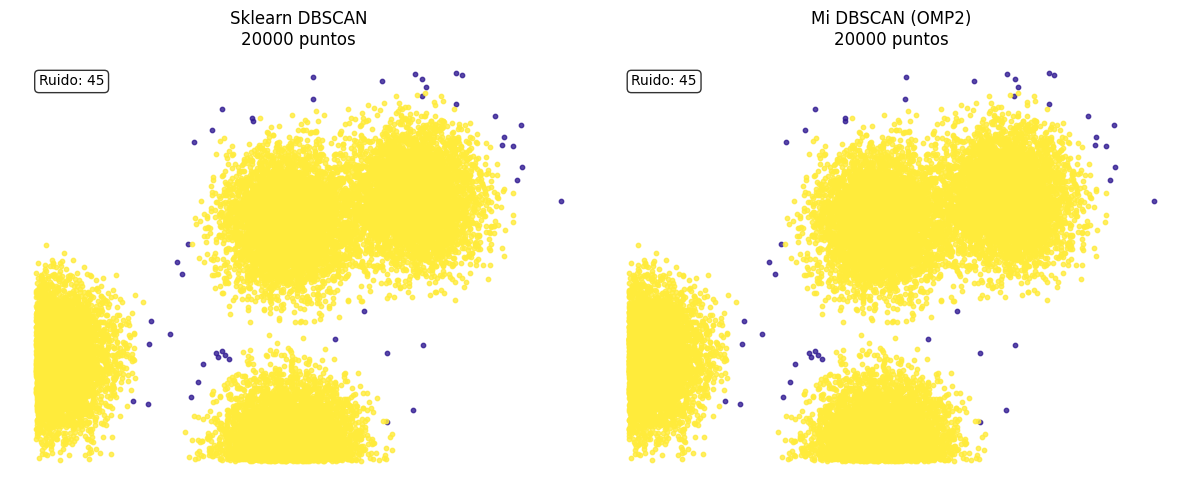

In [19]:
comparar_resultados(20000)

### 🔍 Resultados para 40,000 puntos


🔄 Procesando 40000 puntos...


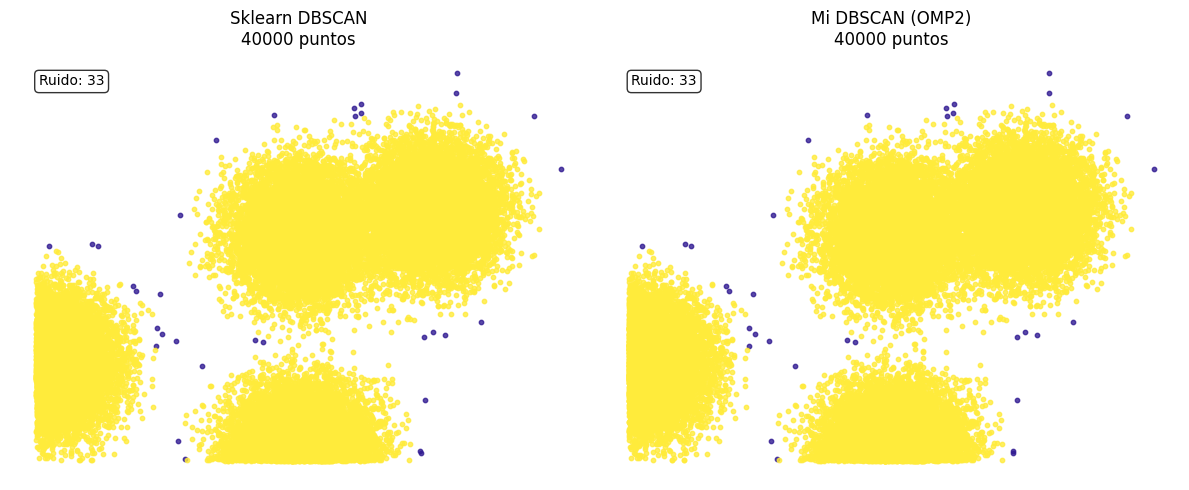

In [20]:
comparar_resultados(40000)

### 🔍 Resultados para 80,000 puntos


🔄 Procesando 80000 puntos...


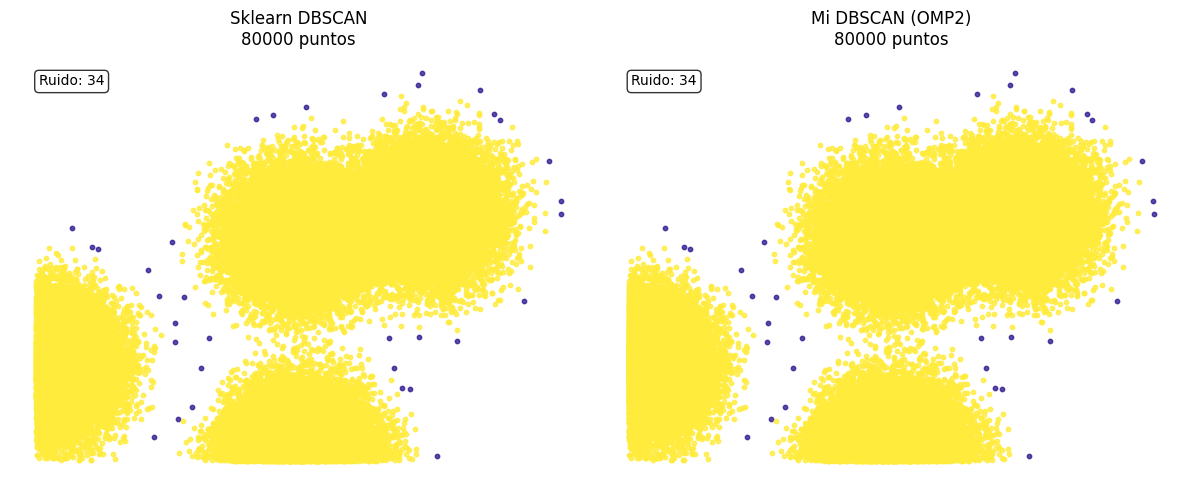

In [21]:
comparar_resultados(80000)

### 🔍 Resultados para 120,000 puntos


🔄 Procesando 120000 puntos...


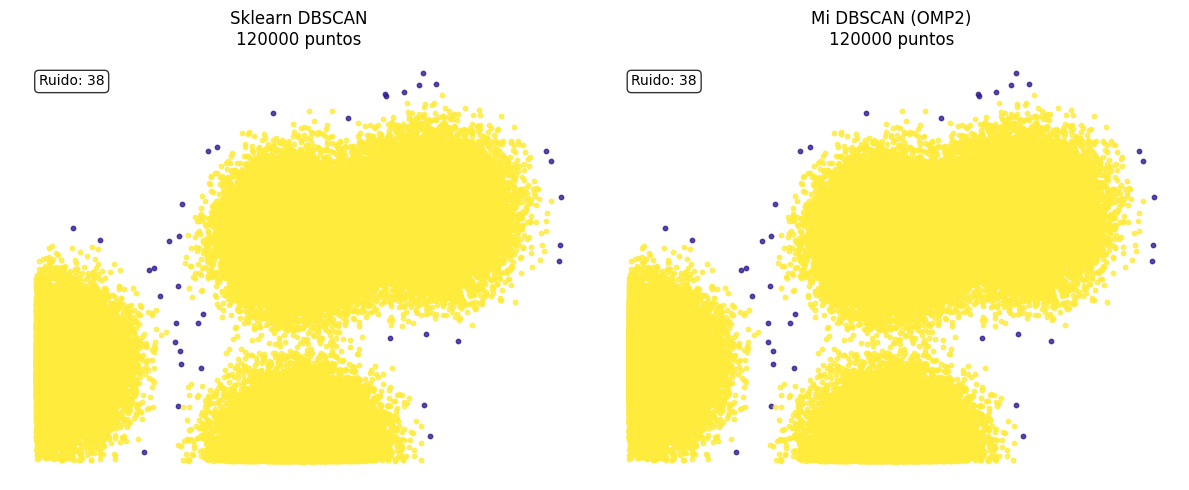

In [22]:
comparar_resultados(120000)

### 🔍 Resultados para 140,000 puntos


🔄 Procesando 140000 puntos...


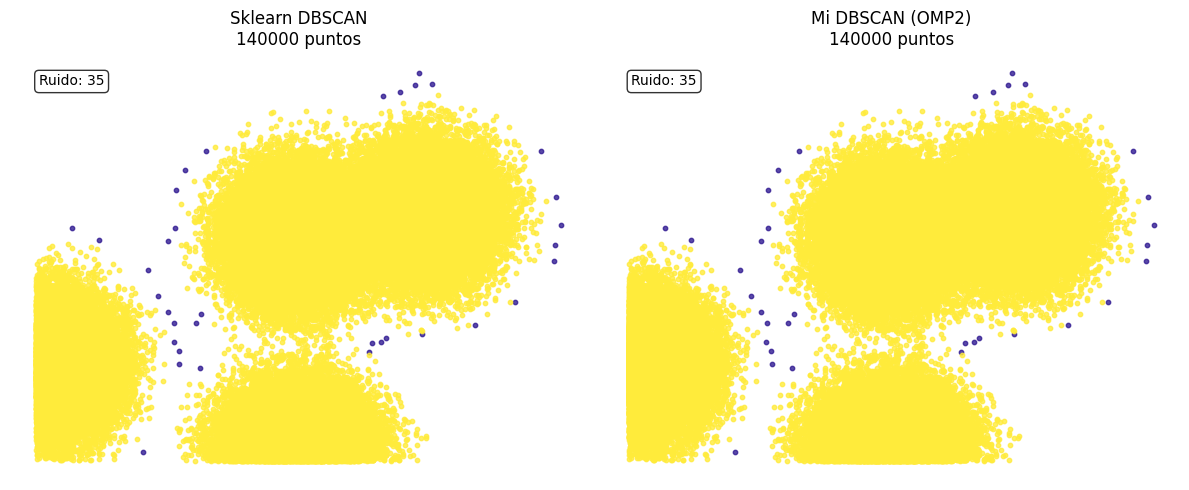

In [23]:
comparar_resultados(140000)

### 🔍 Resultados para 160,000 puntos


🔄 Procesando 160000 puntos...


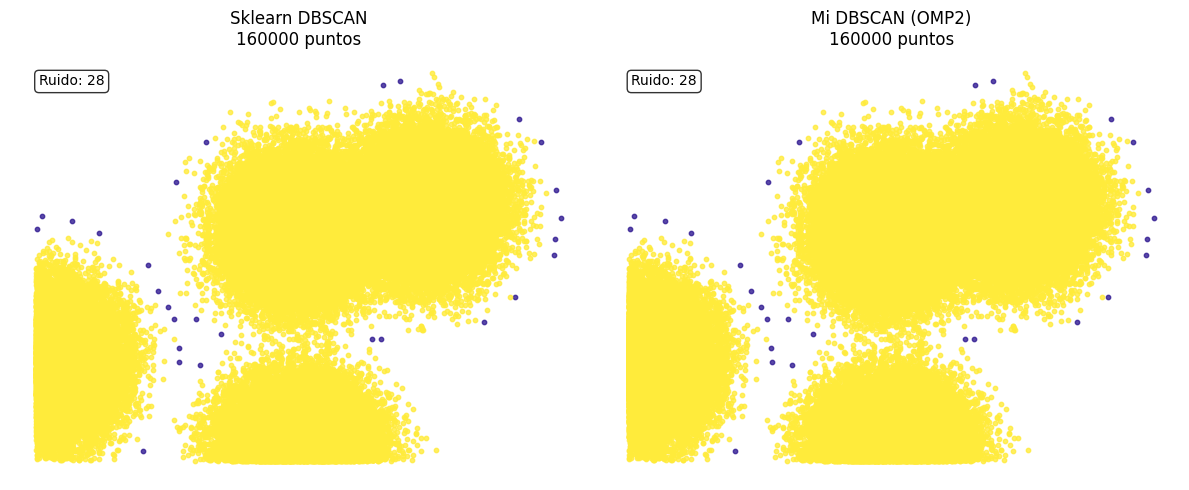

In [24]:
comparar_resultados(160000)

### 🔍 Resultados para 180,000 puntos


🔄 Procesando 160000 puntos...


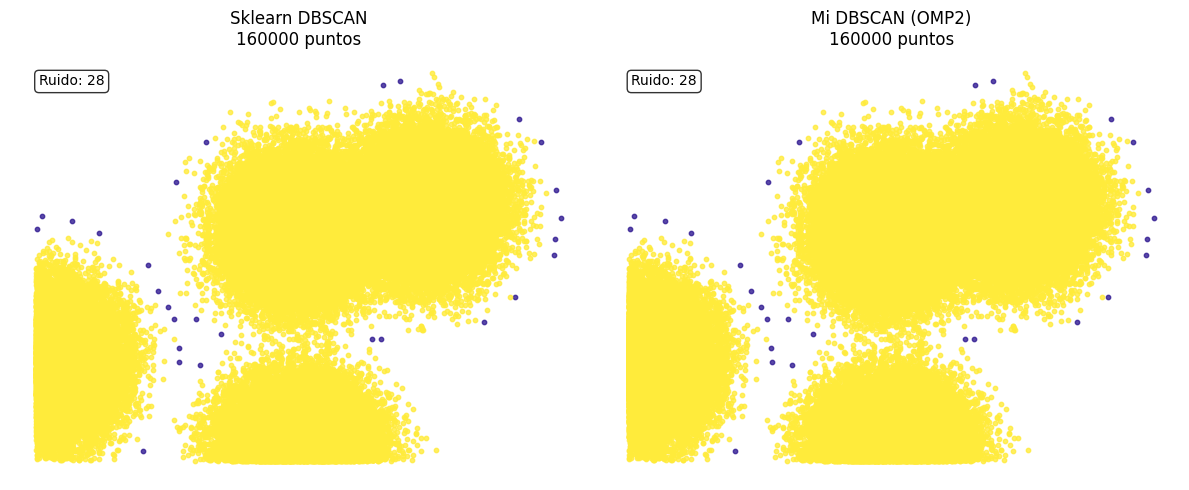

In [25]:
comparar_resultados(160000)

### 🔍 Resultados para 200,000 puntos


🔄 Procesando 200000 puntos...


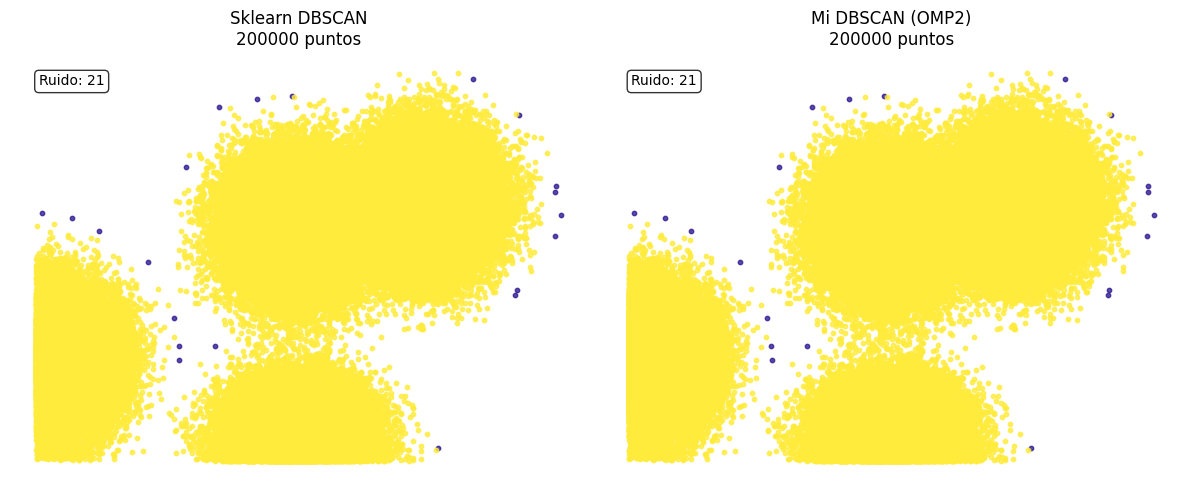

In [26]:
comparar_resultados(200000)